# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [1]:
import pandas as pd
%matplotlib inline
import re
import matplotlib
matplotlib.style.use('fivethirtyeight')
import matplotlib.ticker as ticker

In [2]:
data_1999 = pd.read_excel('FYs97-16_NIVDetailTable.xls', sheetname='FY99')

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [3]:
data_1999.head(5)

,Fiscal Year 1999,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


## Confirm that you have 90 columns and 217 rows

In [4]:
data_1999.shape

(217, 90)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [5]:
data_1999.dtypes

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
                     ...   
O-3                 float64
P-1                 float64
P-2                 float64
P-3                 float64
P-4                 

In [6]:
pd.options.display.max_rows = 217

In [7]:
data_1999.dtypes

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
H-1B1               float64
H-1C                float64
H-2A                float64
H-2B                float64
H-2R                float64
H-3                 

## Rename the "Fiscal Year 1999" row to be "Country"

In [8]:
data_1999.rename(columns = {'Fiscal Year 1999':'Country'}, inplace=True)

## Look at the first 2 rows to make sure you renamed it correctly

In [9]:
data_1999.head(2)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0


# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [10]:
data_1999.head(5)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


In [11]:
data_1999.tail(10)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
207,Uruguay,64.0,417.0,10.0,31.0,14812.0,373.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16776.0,0.0,16776.0
208,Venezuela,127.0,1046.0,15.0,793.0,104675.0,390.0,0.0,0.0,1012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119232.0,0.0,119232.0
209,Totals for South America,1179.0,10696.0,376.0,6552.0,576218.0,255794.0,0.0,0.0,4521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941607.0,0.0,941607.0
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,No Nationality,1.0,4.0,2.0,229.0,4384.0,4899.0,0.0,0.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22851.0,0.0,22851.0
213,United Nations Laissez-Passer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,152.0
214,Totals for Unknown,1.0,4.0,2.0,229.0,4384.0,4899.0,0.0,0.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23003.0,0.0,23003.0
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,Grand Totals,10757.0,66335.0,2279.0,93019.0,3447822.0,642676.0,676386.0,0.0,26494.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6192478.0,0.0,6192478.0


## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [12]:
# NaN values
data_1999[data_1999['A-1'].isnull()]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [13]:
# There is a row for continent above every list of countries

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [14]:
data_1999.loc[data_1999['A-1'].isnull(), 'continent'] = data_1999['Country']

## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

In [15]:
data_1999[data_1999['A-1'].isnull()]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

In [16]:
data_1999['continent'].fillna(method='ffill', inplace=True)

## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [17]:
data_1999

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa


In [18]:
data_1999.continent.value_counts()

Africa           56
Europe           56
Asia             42
North America    25
Oceania          17
South America    15
Unknown           6
Name: continent, dtype: int64

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [19]:
data_1999 = data_1999[data_1999['Grand Total'].notnull()]

### Look at the first 55 rows to be sure it worked

In [20]:
data_1999.head(55)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa
10,Chad,17.0,75.0,1.0,37.0,145.0,144.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,591.0,0.0,591.0,Africa


### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [21]:
data_1999.Country.str.extract('(Totals for)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Totals for    7
Name: Country, dtype: int64

In [22]:
data_1999 = data_1999[data_1999['Country'].str.contains('Totals for') == False]

## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [23]:
data_1999.shape

(196, 91)

In [24]:
data_1999 = data_1999[~data_1999['Country'].str.contains('Grand Totals')]

In [25]:
data_1999.shape

(195, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

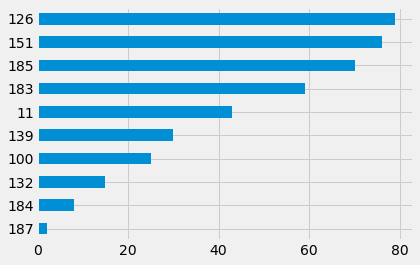

In [26]:
data_1999['Total Visas'].sort_values().head(10).plot(kind='barh', x='Total Visas', y='Country')

## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

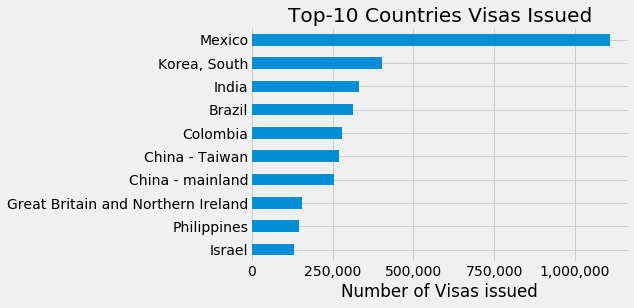

In [27]:
ax = data_1999.sort_values(by='Total Visas', ascending=True).tail(10).plot(kind='barh', x='Country', y='Total Visas')
ax.set_title('Top-10 Countries Visas Issued')
ax.set_xlabel('Number of Visas issued')
ax.yaxis.label.set_visible(False)
ax.legend_.remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.locator_params(axis='x', nbins=5)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

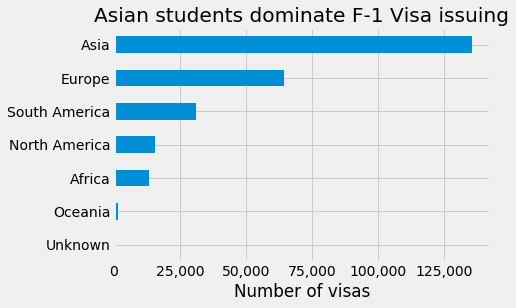

In [28]:
ax = data_1999.groupby('continent')['F-1'].sum().sort_values(ascending=True).plot(kind='barh', x='continent', y='F-1')
ax.set_title('Asian students dominate F-1 Visa issuing')
ax.set_xlabel('Number of visas')
ax.yaxis.label.set_visible(False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.locator_params(axis='x', nbins=6)

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [29]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [30]:
visas_dfs = [pd.read_excel('FYs97-16_NIVDetailTable.xls', sheetname=name) for name in sheetnames]

In [31]:
visas_dfs[0]

,Fiscal Year 1997,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0
5,Burkina Faso,19.0,7.0,1.0,12.0,487.0,309.0,1.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,4.0,1196.0
6,Burundi,5.0,2.0,0.0,57.0,97.0,60.0,3.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.0,74.0,461.0
7,Cameroon,44.0,52.0,11.0,242.0,768.0,1128.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960.0,10.0,2970.0
8,Cape Verde,3.0,23.0,2.0,17.0,3273.0,763.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4261.0,1.0,4262.0
9,Central African Republic,7.0,5.0,0.0,7.0,69.0,33.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0


# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [32]:
for df in visas_dfs:
    df.columns = df.columns.str.replace('Fiscal Year.*', 'Country')

In [33]:
visas_dfs[1]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,48.0,46.0,0.0,1893.0,468.0,3264.0,10.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6469.0,128.0,6597.0
2,Angola,39.0,52.0,1.0,17.0,1395.0,302.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,2222.0
3,Benin,17.0,39.0,1.0,58.0,568.0,102.0,1.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,3.0,1100.0
4,Botswana,22.0,85.0,0.0,1.0,425.0,84.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1238.0,0.0,1238.0
5,Burkina Faso,42.0,31.0,3.0,52.0,739.0,218.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1378.0,1.0,1379.0
6,Burundi,11.0,36.0,0.0,13.0,122.0,44.0,4.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.0,35.0,431.0
7,Cameroon,32.0,85.0,6.0,276.0,1315.0,809.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,3.0,3303.0
8,Cape Verde,12.0,26.0,1.0,5.0,2096.0,573.0,4.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2885.0,0.0,2885.0
9,Central African Republic,9.0,6.0,0.0,12.0,53.0,38.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0


## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [34]:
for df in visas_dfs:
    df.loc[df['A-1'].isnull(), 'continent'] = df['Country']
    df['continent'].fillna(method='ffill', inplace=True)
    df.drop(df.index[df['Country'].str.contains("Totals for", na=False)], inplace=True)
    df.drop(df.index[df['Grand Total'].isnull()], inplace=True)
    df.drop(df.index[df['Country'].str.contains('Grand Totals')], inplace = True)

In [35]:
visas_dfs[1]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
1,Algeria,48.0,46.0,0.0,1893.0,468.0,3264.0,10.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6469.0,128.0,6597.0,Africa
2,Angola,39.0,52.0,1.0,17.0,1395.0,302.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,2222.0,Africa
3,Benin,17.0,39.0,1.0,58.0,568.0,102.0,1.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,3.0,1100.0,Africa
4,Botswana,22.0,85.0,0.0,1.0,425.0,84.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1238.0,0.0,1238.0,Africa
5,Burkina Faso,42.0,31.0,3.0,52.0,739.0,218.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1378.0,1.0,1379.0,Africa
6,Burundi,11.0,36.0,0.0,13.0,122.0,44.0,4.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396.0,35.0,431.0,Africa
7,Cameroon,32.0,85.0,6.0,276.0,1315.0,809.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,3.0,3303.0,Africa
8,Cape Verde,12.0,26.0,1.0,5.0,2096.0,573.0,4.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2885.0,0.0,2885.0,Africa
9,Central African Republic,9.0,6.0,0.0,12.0,53.0,38.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0,Africa
10,Chad,34.0,55.0,1.0,16.0,134.0,264.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,715.0,1.0,716.0,Africa


## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [36]:
for df, fiscal_year in zip(visas_dfs, sheetnames):
    df['year'] = fiscal_year

In [37]:
visas_dfs[-1]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,U-5,Total Visas,BCC,Grand Total,continent,year
1,Algeria,42.0,359.0,0.0,15.0,14503.0,20.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,16107.0,0.0,16107.0,Africa,FY16
2,Angola,91.0,98.0,0.0,1.0,4422.0,610.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,6409.0,0.0,6409.0,Africa,FY16
3,Benin,40.0,109.0,0.0,8.0,1601.0,5.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2221.0,0.0,2221.0,Africa,FY16
4,Botswana,7.0,87.0,0.0,6.0,974.0,10.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1423.0,0.0,1423.0,Africa,FY16
5,Burkina Faso,21.0,91.0,1.0,12.0,4811.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,5925.0,0.0,5925.0,Africa,FY16
6,Burundi,19.0,31.0,0.0,1.0,968.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1321.0,0.0,1321.0,Africa,FY16
7,Cabo Verde,10.0,62.0,1.0,3.0,3392.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3821.0,0.0,3821.0,Africa,FY16
8,Cameroon,72.0,474.0,0.0,14.0,9937.0,19.0,0.0,0.0,20.0,...,0.0,0.0,2.0,0.0,0.0,12418.0,0.0,12418.0,Africa,FY16
9,Central African Republic,20.0,20.0,0.0,0.0,132.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,296.0,0.0,296.0,Africa,FY16
10,Chad,34.0,173.0,1.0,85.0,451.0,364.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1355.0,0.0,1355.0,Africa,FY16


# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

In [38]:
one_visas_dfs = pd.concat(visas_dfs)

In [39]:
one_visas_dfs.year.value_counts()

FY11    201
FY12    201
FY16    200
FY09    200
FY14    200
FY15    200
FY08    200
FY13    200
FY10    200
FY06    198
FY04    197
FY03    197
FY00    197
FY07    197
FY01    197
FY02    197
FY05    197
FY99    195
FY98    195
FY97    195
Name: year, dtype: int64

## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with FY1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

In [40]:
one_visas_dfs['year'] = one_visas_dfs['year'].str.replace('FY9', '199')

In [41]:
one_visas_dfs['year'] = one_visas_dfs['year'].str.replace('FY', '20')

In [42]:
one_visas_dfs.year.value_counts()

2012    201
2011    201
2009    200
2008    200
2014    200
2013    200
2010    200
2015    200
2016    200
2006    198
2001    197
2004    197
2000    197
2002    197
2007    197
2005    197
2003    197
1999    195
1998    195
1997    195
Name: year, dtype: int64

In [43]:
one_visas_dfs.year = one_visas_dfs.year.astype(str)

In [44]:
one_visas_dfs.year = pd.to_datetime(one_visas_dfs['year'], yearfirst=True, format='%Y')

In [45]:
one_visas_dfs.dtypes

A-1                   float64
A-2                   float64
A-3                   float64
B-1                   float64
B-1,2                 float64
B-1,2/BCC             float64
B-1,2/BCV             float64
B-2                   float64
BCC                   float64
C-1                   float64
C-1/D                 float64
C-2                   float64
C-3                   float64
CW-1                  float64
CW-2                  float64
Country                object
D                     float64
D-CREW                float64
E-1                   float64
E-2                   float64
E-2C                  float64
E-3                   float64
E-3D                  float64
E-3R                  float64
F-1                   float64
F-2                   float64
F-3                   float64
G-1                   float64
G-2                   float64
G-3                   float64
G-4                   float64
G-5                   float64
Grand Total           float64
H-1A      

# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

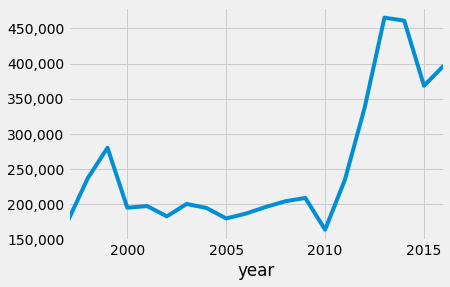

In [46]:
ax = one_visas_dfs[one_visas_dfs.Country == 'Colombia'].plot(kind='line', x='year', y='Grand Total')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend_.remove()

## How about Iraq?

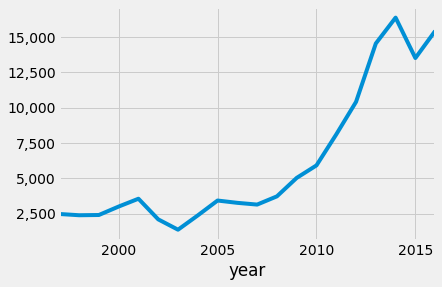

In [47]:
ax = one_visas_dfs[one_visas_dfs.Country == 'Iraq'].plot(kind='line', x='year', y='Grand Total')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend_.remove()

## Mexico?

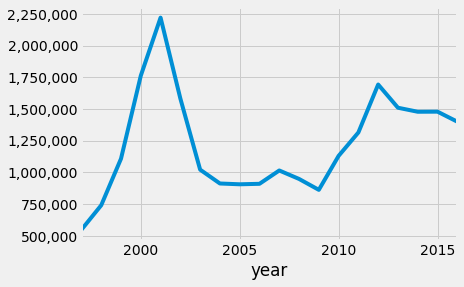

In [48]:
ax = one_visas_dfs[one_visas_dfs.Country == 'Mexico'].plot(kind='line', x='year', y='Grand Total')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend_.remove()